In [ ]:
%%html
<!-- CSS settings for this notbook -->
<style>
    h1 {color:#03A}
    h2 {color:purple}
    h3 {color:#0099ff}
    hr {    
        border: 0;
        height: 3px;
        background: #333;
        background-image: linear-gradient(to right, #ccc, black, #ccc);
    }
</style>

&copy; 2025 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the textbook [**Intro Python for Computer Science and Data Science**](https://amzn.to/2YU0QTJ) and our professional book [**Python for Programmers**](https://amzn.to/2VvdnxE) — Please do not purchase both. The professional book is a subset of the textbook.

### Python Fundamentals LiveLessons Videos
* For a detailed presentation of the content in this notebook see **[Lesson 6](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson06_00)** on O'Reilly Online Learning

# 6. Dictionaries and Sets

# 6.1 Introduction
* Dictionaries for unordered collections of key–value pairs.
* Sets for unordered collections of unique values.
* Common dictionary and set manipulations. 
* Dictionary and set comparison operators.
* Operators `in` and `not` `in` with dictionaries and sets.
* Dictionary and set comprehensions.
* A dynamic Matplotlib/Seaborn visualization.

# 6.2 Dictionaries
* A dictionary **maps** keys to values. 
* Keys must be **immutable** and **unique**.
* Dictionaries also do not support slicing.

### Examples of Dictionaries

| Keys | Key type | Values | Value type |
| :-------- | :-------- | :-------- | :-------- |
| Country names | `str` | Internet country codes | `str`  |
| Decimal numbers | `int` | Roman numerals | `str`  |
| Baseball players | `str`  | Batting averages | `float`  |

## 6.2.1 Creating a Dictionary

In [1]:
country_codes = {'Finland': 'fi', 'South Africa': 'za', 'Nepal': 'np'}

In [2]:
country_codes

{'Finland': 'fi', 'South Africa': 'za', 'Nepal': 'np'}

### Built-In Function `len` Returns the Number of Key–Value Pairs

In [3]:
len(country_codes)

3

### Can Use a Dictionary as a Condition to Determine Whether It’s Empty

In [4]:
if country_codes:
    print('country_codes is not empty')
else:
    print('country_codes is empty')

country_codes is not empty


## 6.2.2 Iterating through a Dictionary 

In [5]:
days_per_month = {'January': 31, 'February': 28, 'March': 31}

### Method **`items`** Returns Key–Value Pairs as Tuples

In [6]:
days_per_month

{'January': 31, 'February': 28, 'March': 31}

In [7]:
for month, days in days_per_month.items():
    print(f'{month} has {days} days')

January has 31 days
February has 28 days
March has 31 days


## 6.2.3 Basic Dictionary Operations
* `'X'` value is **intentionally incorrect**.

In [8]:
roman_numerals = {'I': 1, 'II': 2, 'III': 3, 'V': 5, 'X': 100}

In [9]:
roman_numerals

{'I': 1, 'II': 2, 'III': 3, 'V': 5, 'X': 100}

### Accessing the Value Associated with a Key

In [10]:
roman_numerals['V']

5

### Updating the Value of an Existing Key–Value Pair

In [11]:
roman_numerals['X'] = 10  # fix incorrect value

In [12]:
roman_numerals

{'I': 1, 'II': 2, 'III': 3, 'V': 5, 'X': 10}

### Adding a New Key–Value Pair By Assigning to a Nonexistent Key

In [13]:
roman_numerals['L'] = 50

In [14]:
roman_numerals

{'I': 1, 'II': 2, 'III': 3, 'V': 5, 'X': 10, 'L': 50}

### Removing a Key–Value Pair

In [ ]:
del roman_numerals['III']

In [ ]:
roman_numerals

### Removing a Key–Value Pair and Getting the Corresponding Value

In [15]:
roman_numerals.pop('X')

10

In [16]:
roman_numerals

{'I': 1, 'II': 2, 'III': 3, 'V': 5, 'L': 50}

### Attempting to Access a Nonexistent Key via `[]` is a `KeyError`

In [ ]:
roman_numerals['III']

### Dictionary Method **`get`** Returns `None` if the Key Is Not Found

In [17]:
roman_numerals.get('III')  # no output because None is returned

3

In [18]:
roman_numerals.get('V')

5

### `get` with a Second Argument Returns That Value When the Key Is Not Found

In [19]:
roman_numerals.get('III', 'your app-specific useful value')

3

In [20]:
type(roman_numerals)

dict

In [21]:
if roman_numerals.get('III'):
    print('true')
else:
    print('false')

true


### Operators `in` and `not` `in` Test Whether a Dictionary Contains a Key 

In [22]:
roman_numerals

{'I': 1, 'II': 2, 'III': 3, 'V': 5, 'L': 50}

In [23]:
'V' in roman_numerals

True

In [24]:
'III' in roman_numerals 

True

## 6.2.4 Dictionary Methods `keys` and `values` 

In [25]:
months = {'January': 1, 'February': 2, 'March': 3}

In [26]:
for month_name in months.keys():
    print(month_name, end='  ')

January  February  March  

In [27]:
for month_number in months.values():
    print(month_number, end='  ')

1  2  3  

### Dictionary Methods `items`, `keys` and `values` Each Return a View of a Dictionary’s Data
* When you iterate over a **`view`**, it “sees” the dictionary’s **current contents** — it does **not** have its own copy of the data.

## 6.2.5 Dictionary Comparisons with `==` and `!=` 
* `==` is `True` if both dictionaries have the same key–value pairs, **_regardless_ of insertion order**

In [28]:
country_capitals1 = {'Belgium': 'Brussels',
                     'Haiti': 'Port-au-Prince'}

In [29]:
country_capitals2 = {'Nepal': 'Kathmandu',
                     'Uruguay': 'Montevideo'}

In [30]:
country_capitals3 = {'Haiti': 'Port-au-Prince',
                     'Belgium': 'Brussels'}

In [31]:
country_capitals1 == country_capitals3

True

In [32]:
country_capitals1 == country_capitals2

False

## 6.2.7 Example: Word Counts 
* The following script builds a dictionary to count the number of occurrences of each word in a **tokenized** string. 
* Python automatically concatenates strings separated by whitespace in parentheses. 

```python
# fig06_02.py
"""Tokenizing a string and counting unique words."""

text = ('this is sample text with several words '
        'this is more sample text with some different words')

word_counts = {}

# count occurrences of each unique word
for word in text.split():
    if word in word_counts: 
        word_counts[word] += 1  # update existing key-value pair
    else:
        word_counts[word] = 1  # insert new key-value pair

print(f'{"WORD":<12}COUNT')

for word, count in sorted(word_counts.items()):
    print(f'{word:<12}{count}')

print('\nNumber of unique words:', len(word_counts))
```

In [33]:
run fig06_02.py

WORD        COUNT
different   1
is          2
more        1
sample      2
several     1
some        1
text        2
this        2
with        2
words       2

Number of unique words: 10


## Use autovivification (like Perl)

In [38]:
from collections import defaultdict

text = ('this is sample text with several words ' 
        'this is more sample text with some different words')

word_counts = defaultdict(lambda : 0)

# count occurrences of each unique word
for word in text.split():
    word_counts[word] += 1
  #  if word in word_counts: 
  #      word_counts[word] += 1  # update existing key-value pair
  #  else:
  #      word_counts[word] = 1  # insert new key-value pair

print(f'{"WORD":<12}COUNT')

for word, count in sorted(word_counts.items()):
    print(f'{word:<12}{count}')

print('\nNumber of unique words:', len(word_counts))


WORD        COUNT
different   1
is          2
more        1
sample      2
several     1
some        1
text        2
this        2
with        2
words       2

Number of unique words: 10


In [35]:
defaultdict?

Init signature: defaultdict(self, /, *args, **kwargs)
Docstring:     
defaultdict(default_factory=None, /, [...]) --> dict with default factory

The default factory is called without arguments to produce
a new value when a key is not present, in __getitem__ only.
A defaultdict compares equal to a dict with the same items.
All remaining arguments are treated the same as if they were
passed to the dict constructor, including keyword arguments.
File:           ~/anaconda3/lib/python3.12/collections/__init__.py
Type:           type
Subclasses:     FreezableDefaultDict

### Python Standard Library Module `collections` and Class **`Counter`**
* The Python Standard Library already contains the counting functionality shown above. 
* A **`Counter`** receives an iterable and summarizes its elements. 

In [41]:
from collections import Counter

In [42]:
text = ('this is sample text with several words '
        'this is more sample text with some different words')

In [43]:
counter = Counter(text.split())

In [44]:
for word, count in sorted(counter.items()):
    print(f'{word:<12}{count}')

different   1
is          2
more        1
sample      2
several     1
some        1
text        2
this        2
with        2
words       2


In [45]:
print('Number of unique keys:', len(counter))

Number of unique keys: 10


## 6.2.8 Dictionary Method `update` Can Insert and Update Key–Value Pairs
* Method `update` also can receive an iterable object containing key–value pairs, such as a list of two-element tuples.

In [48]:
country_codes = {}

In [49]:
# could receive dict of many key-value pairs
country_codes.update({'South Africa': 'za'})

In [50]:
country_codes

{'South Africa': 'za'}

* Method `update` converts keyword arguments into key–value pairs.

In [51]:
country_codes.update(Australia='ar')  # purposely incorrect country code 'ar'

In [52]:
country_codes

{'South Africa': 'za', 'Australia': 'ar'}

* Let's update the country code for `Australia`. 

In [53]:
country_codes.update(Australia='au')  # fixes incorrect value

In [57]:
country_codes

{'South Africa': 'za',
 'Australia': 'au',
 'Iceland': 'ic',
 'USA': 'usa',
 'Russia': 'ru'}

In [56]:
country_codes.update(Iceland='ic', USA='usa', Russia='ru')

## Dictionary union operators | and |= (Python 3.9)
https://www.python.org/dev/peps/pep-0584 

In [58]:
capitals1 = {'Belgium': 'Brusels', # misspelled
             'Haiti': 'Port-au-Prince'}

In [60]:
capitals1

{'Belgium': 'Brusels', 'Haiti': 'Port-au-Prince'}

In [59]:
capitals2 = {'Nepal': 'Kathmandu',
             'Uruguay': 'Montevideo',
             'Belgium': 'Brussels'}

In [61]:
capitals2

{'Nepal': 'Kathmandu', 'Uruguay': 'Montevideo', 'Belgium': 'Brussels'}

In [62]:
capitals1 | capitals2

{'Belgium': 'Brussels',
 'Haiti': 'Port-au-Prince',
 'Nepal': 'Kathmandu',
 'Uruguay': 'Montevideo'}

In [63]:
capitals1

{'Belgium': 'Brusels', 'Haiti': 'Port-au-Prince'}

In [64]:
capitals1 |= capitals2

In [65]:
capitals1

{'Belgium': 'Brussels',
 'Haiti': 'Port-au-Prince',
 'Nepal': 'Kathmandu',
 'Uruguay': 'Montevideo'}

In [66]:
capitals2

{'Nepal': 'Kathmandu', 'Uruguay': 'Montevideo', 'Belgium': 'Brussels'}

## 6.2.9 Dictionary Comprehensions
* Quickly generate dictionaries, often by **mapping** one dictionary to another. 
* Expression to the left of the `for` clause specifies a **key–value pair of the form _key_`:` _value_**. 
* In a dictionary with **_unique_ values**, you can **reverse** the key–value pair mappings. 

In [67]:
months = {'January': 1, 'February': 2, 'March': 3}

In [68]:
months2 = {number: name for name, number in months.items()}

In [69]:
months2

{1: 'January', 2: 'February', 3: 'March'}

In [70]:
months2[3]

'March'

In [71]:
months

{'January': 1, 'February': 2, 'March': 3}

### Map a Dictionary’s Values to New Values with a Comprehension
* From a dictionary of names and lists of grades, create a dictionary of names and grade-point averages.

In [72]:
grades = {'Sue': [98, 87, 94], 
          'Bob': [84, 95, 91]}

In [73]:
grades2 = {k: sum(v) / len(v) for k, v in grades.items()}

In [74]:
grades2

{'Sue': 93.0, 'Bob': 90.0}

# Keyword-Only Parameters and Arbitrary Keyword Argument Lists
> **Python 3.0**, Lesson 6  
> Python Tutorial Section 4.8.2, Keyword Arguments  
https://docs.python.org/3/tutorial/controlflow.html#keyword-arguments  
> New section for Lesson 6 where we cover dictionaries 


## Keyword-Only Parameters
* Just as a function may specify positional-only parameters before a backslash (`\`) in the parameter list, a function may specify keyword-only parameters by placing an asterisk (`*`) in the parameter list
    * Subsequent arguments must be passed as keyword arguments 

## Arbitrary Keyword Arguments
* A function using parameter `*args` can receive any number of positional arguments
    * Must place keyword arguments after positional arguments
* If last parameter in a function’s parameter list is `**kwargs`, function may receive an arbitrary number of keyword arguments
* Useful for
    * Functions that receive any number of keyword arguments or
    * Cases in which some keyword arguments are optional
* Interpreter places extra keyword arguments in a dictionary and passes it to `kwargs`
    * Short for “keyword arguments”
    * You may use any valid identifier for this parameter

## Function That Receives Required and Optional Keyword Arguments 
* Consider a `send_mail` function that simulates sending an email 

In [75]:
def send_email(*, sender, recipient, **kwargs):
    print(f'sender: {sender}\nrecipient: {recipient}')

    # display the optional keyword arguments, if any
    if kwargs:
        for key, value in kwargs.items():
            print(f'{key}: {value}')
    else:
        print('\nNo additional keyword arguments.')

* Most email systems require only the `sender`’s and `recipient`’s email addresses, so these are required
* If `kwargs` contains data, `for` statement displays the additional key–value pairs
* Call with just required arguments:

In [ ]:
send_email(sender='test1@deitel.com', 
    recipient='test2@deitel.com')

Call with required arguments as well as arguments for the email’s `subject` and `body`:

In [ ]:
send_email(sender='test1@deitel.com',
    recipient='test2@deitel.com',
    subject='Testing send_email',
    body='Testing our email simulation function.')

## Expanding an Existing Dictionary’s Key-Value Pairs As Keyword Arguments
* Can pass a dictionary of key-value pairs to `send_mail`

In [ ]:
parameters = {
    'subject': 'Testing send_email',
    'body': 'Testing our email simulation function.',
    'cc': 'test3@deitel.com',
    'bcc': 'test4@deitel.com',
    'sender': 'test1@deitel.com',
    'recipient': 'test2@deitel.com'
}

* Use `**` dictionary unpacking operator to extract the parameter dictionary’s key–value pairs and pass them as keyword arguments

In [ ]:
send_email(**parameters)

# 6.3 Sets
* Unordered collections of **unique values**. 
* May contain **only immutable objects**, like strings, `int`s, `float`s and tuples that contain only immutable elements. 
* Sets do not support indexing and slicing. 

### Creating a Set with Curly Braces
* Duplicates are ignored&mdash;great for **duplicate elimination**.

In [76]:
colors = {'red', 'orange', 'yellow', 'green', 'red', 'blue'}

* Though the output below is sorted, sets are **unordered**&mdash;do not write order-dependent code. 

In [77]:
colors

{'blue', 'green', 'orange', 'red', 'yellow'}

### Determining a Set’s Length

In [78]:
len(colors)

5

### Operators `in` and `not` `in`: Checking Whether a Value Is in a Set 

In [79]:
colors

{'blue', 'green', 'orange', 'red', 'yellow'}

In [80]:
'red' in colors

True

In [81]:
'purple' in colors

False

### Iterating Through a Set

In [82]:
colors

{'blue', 'green', 'orange', 'red', 'yellow'}

In [83]:
for color in colors:  # no significance to iteration order
    print(color.upper(), end=' ')

GREEN BLUE RED YELLOW ORANGE 

### Creating a Set from Another Collection with the Built-In `set` Function

In [84]:
numbers = list(range(5)) + list(range(3))

In [85]:
numbers

[0, 1, 2, 3, 4, 0, 1, 2]

In [86]:
set(numbers)

{0, 1, 2, 3, 4}

In [87]:
for i in set(numbers):
    print(i)

0
1
2
3
4


### Creating an Empty Set 
* Must use the **`set()`**, because **`{}` represents an empty dictionary**.
* Python displays an empty set as `set()` to avoid confusion with an empty dictionary (`{}`).

In [88]:
type({})

dict

In [89]:
s = set()

In [90]:
s

set()

In [91]:
len(s)

0

In [92]:
type(s)

set

### Frozenset: An Immutable Set Type
* **Sets are _mutable_** — you can add and remove elements.
* **Set _elements_ must be _immutable_**; therefore, a set cannot have other sets as elements.
* A **frozenset** is an _immutable_ set — it cannot be modified after you create it, so a set _can_ contain frozensets as elements. 
* The built-in function **`frozenset`** creates a frozenset from any iterable. 

## 6.3.1 Comparing Sets

### Comparing for Equality and Inequality

In [93]:
{1, 3, 5} == {3, 5, 1}

True

In [94]:
{1, 3, 5} != {3, 5, 1}

False

### Testing for Proper and Improper Subsets/Supersets
* Use `<` and `>` to test for proper subsets and supersets
* Use `<=` and `>=` or methods `issubset` and `issuperset` to test for improper subsets and supersets
    * The methods convert their arguments to sets first
    * Their arguments can be any iterable object

## 6.3.2 Mathematical Set Operations 
* The method versions receive any iterable and convert it to a set, then perform the corresponding mathematical set operation.

| Operation | Set Operator | Corresponding Method  |
| :-----| :-----| :----- |
| Union | `\|` | `union` |
| Intersection | `&` | `intersection` |
| Difference | `-` | `difference` |
| Symmetric Difference | `^` | `symmetric_difference` |
| Disjoint | N/A | `isdisjoint` |

## 6.3.3 Mutable Set Operators and Methods
* The operators and methods presented in the preceding section each result in a _new_ set. 
* There are also operators and methods that **modify an _existing_ set**. 
* See the [`set` documentation](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) for a complete list of operators and methods.

### Methods for Adding and Removing Elements
* Set method **`add`** inserts its argument if the argument is _not_ already in the set; otherwise, the set remains unchanged.

In [ ]:
numbers

In [ ]:
myset = set(numbers)

In [ ]:
myset

In [ ]:
myset.add(17)

In [ ]:
myset

In [ ]:
myset.add(3)

In [ ]:
myset

### Removing a Specific Element with Set Method **`remove`** 
* Removes its argument from the set&mdash;raises a **`KeyError`** if the value is not in the set.
* Method **`discard`** also removes its argument from the set but **does not cause an exception if the value is not in the set**.

In [ ]:
myset.remove(3)  # KeyError if 3 not in set

In [ ]:
myset

### Clearing a Set

In [ ]:
myset.clear()

In [ ]:
myset

## 6.3.4 Set Comprehensions

In [95]:
numbers = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10]

In [96]:
evens = {item for item in numbers if item % 2 == 0}

In [97]:
evens

{2, 4, 6, 8, 10}

# 6.4 Dynamic Visualizations
* The Matplotlib **`animation`** module’s [**`FuncAnimation`** function](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.animation.FuncAnimation.html) updates a plot _dynamically_.

<img alt="Sample image of the dynamic die rolling simulation after 64 die rolls" src="./ch06images/Animation_01.png" width="500"/>
<img alt="Sample image of the dynamic die rolling simulation after 604 die rolls" src="./ch06images/Animation_02.png" width="500"/>


### Animation Frames
* `FuncAnimation` drives a **frame-by-frame animation**. 
* Each **animation frame** specifies what to change during one plot update. 
* Stringing together many updates over time creates an animation. 
* This example displays an animation frame every 33 milliseconds—yielding approximately 30 (1000 / 33) frames-per-second. 

### Test-Driving `RollDieDynamic.py` from the Command Line
1. Access the command line in Jupyter with **File > New > Terminal**.
2. `cd ch06`.
3. Execute

```
ipython RollDieDynamic.py 6000 1
```
* 6000 is the number of animation frames to display. 
* 1 is the number of die rolls to summarize in each animation frame.


## 6.4.2 Implementing a Dynamic Visualization 
To be able to run FuncAnimations in JupyterLab (instructions from https://github.com/matplotlib/jupyter-matplotlib):
1. `conda install -c conda-forge ipympl`

In [98]:
%matplotlib widget

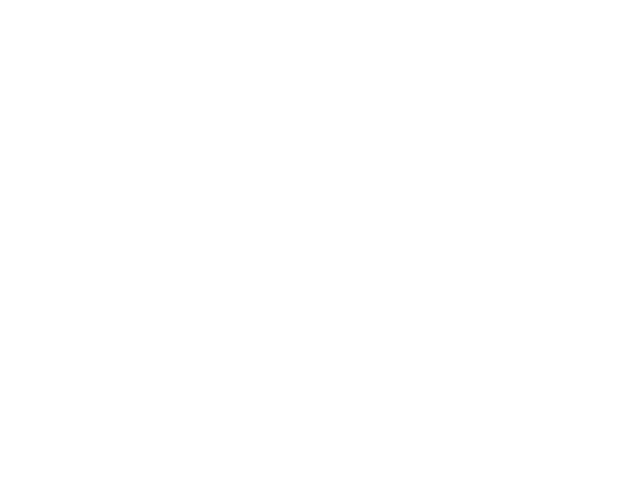

In [99]:
# RollDieDynamic.py
"""Dynamically graphing frequencies of die rolls."""
from matplotlib import animation
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import sys

def update(frame_number, rolls, faces, frequencies):
    """Configures bar plot contents for each animation frame."""
    # roll die and update frequencies
    for i in range(rolls):
        frequencies[random.randrange(1, 7) - 1] += 1 

    # reconfigure plot for updated die frequencies
    plt.cla()  # clear old contents contents of current Figure
    axes = sns.barplot(x=values, y=frequencies, palette='bright', hue=values, legend=False)
    axes.set_title(f'Die Frequencies for {sum(frequencies):,} Rolls')
    axes.set(xlabel='Die Value', ylabel='Frequency')  
    axes.set_ylim(top=max(frequencies) * 1.10)  # scale y-axis by 10%

    # display frequency & percentage above each patch (bar)
    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        text = f'{frequency:,}\n{frequency / sum(frequencies):.3%}'
        axes.text(text_x, text_y, text, ha='center', va='bottom')
        
        
# read command-line arguments for number of frames and rolls per frame
number_of_frames = 1000  # int(sys.argv[1])  
rolls_per_frame = 1  # int(sys.argv[2])  

sns.set_style('whitegrid')  # white background with gray grid lines
figure = plt.figure('Rolling a Six-Sided Die')  # Figure for animation
values = list(range(1, 7))  # die faces for display on x-axis
frequencies = [0] * 6  # six-element list of die frequencies 

# configure and start animation that calls function update
die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=number_of_frames - 1, interval=33,
    fargs=(rolls_per_frame, values, frequencies))

plt.show()  # display window

## Notes About the Preceding Code for Your Reference
### Function `update`
`FuncAnimation` calls the `update` function once per animation frame. This function must receive at least one argument. The parameters are:
* `frame_number` — The next value from `FuncAnimation`’s `frames` argument, which we’ll discuss momentarily. Though `FuncAnimation` requires the `update` function to have this parameter, we do not use it in this `update` function.
* `rolls` — The number of die rolls per animation frame.
* `faces` — The die face values used as labels along the graph’s _x_-axis.
* `frequencies` — The list in which we summarize the die frequencies.

### Create a **`FuncAnimation`** to Update the Bar Chart Dynamically
* **You _must_ store the reference to the animation**; otherwise, Python immediately terminates the animation and returns its memory to the system. 

### FuncAnimation Has Two Required Arguments
* `figure` — the `Figure` object in which to display the animation, and
* `update` — the function that's **called once per animation frame**.

### Other Arguments
* **`repeat`** — False terminates the animation after the specified number of frames. If `True` (the default), when the animation completes it restarts from the beginning.
* **`frames`** — The total number of animation frames, which controls how many times `FunctAnimation` calls `update`. Passing an integer is equivalent to passing a `range` — for example, `600` means `range(600)`. `FuncAnimation` passes one value from this range as the first argument in each call to `update`. 
* **`interval`** — The number of milliseconds (33, in this case) between animation frames (the default is 200). After each call to `update`, `FuncAnimation` waits 33 milliseconds before making the next call. 
* **`fargs`** (short for “function arguments”) — A tuple of other arguments to pass to the function you specified in `FuncAnimation`’s second argument. The arguments you specify in the `fargs` tuple correspond to `update`’s parameters `rolls`, `faces` and `frequencies`.

[List of FuncAnimation’s other optional arguments](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html)

# More Info 
* See Lesson 6 in [**Python Fundamentals LiveLessons** here on O'Reilly Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 6 in [**Python for Programmers** on O'Reilly Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* Interested in a print book? Check out:

| Python for Programmers | Intro to Python for Computer<br>Science and Data Science
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2025 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the textbook [**Intro Python for Computer Science and Data Science**](https://amzn.to/2YU0QTJ) and our professional book [**Python for Programmers**](https://amzn.to/2VvdnxE) — Please do not purchase both. The professional book is a subset of the textbook.